In [1]:
os.chdir('../../')
from Classes.Model_Setup.Conversion import *
from Classes.Model_Setup.Model import *
from Classes.Model_Setup.Plot import *
from Classes.Model_Setup.TrainTestSplit import *
from Classes.Data_Manipulation.Splitting_Data import *

from tensorflow import keras

In [2]:
num_classes = 50   #340 max 
ims_per_class = 20000  #max?

splitData(num_classes)

path = 'Data/'+str(num_classes)+'_Categories/'

TrainArray = trainArray(path, num_classes, ims_per_class)
TestArray = testArray(path, num_classes, 100)

y_train, X_train, y_val, X_val, y_test, X_test = SplitData(TrainArray, TestArray, num_classes)

model = model(num_classes)

 60%|██████    | 30/50 [04:43<03:08,  9.44s/it]


OSError: [WinError 1450] Insufficient system resources exist to complete the requested service

In [ ]:
import pickle
with open(path+'X_test.data', 'wb') as f:
    pickle.dump(X_test, f)

array([[[[1.],
         [1.],
         [1.],
         ...,
         [1.],
         [1.],
         [1.]],

        [[1.],
         [1.],
         [1.],
         ...,
         [1.],
         [1.],
         [1.]],

        [[1.],
         [1.],
         [1.],
         ...,
         [1.],
         [1.],
         [1.]],

        ...,

        [[1.],
         [1.],
         [1.],
         ...,
         [1.],
         [1.],
         [1.]],

        [[1.],
         [1.],
         [1.],
         ...,
         [1.],
         [1.],
         [1.]],

        [[1.],
         [1.],
         [1.],
         ...,
         [1.],
         [1.],
         [1.]]],


       [[[1.],
         [1.],
         [1.],
         ...,
         [1.],
         [1.],
         [1.]],

        [[1.],
         [1.],
         [1.],
         ...,
         [1.],
         [1.],
         [1.]],

        [[1.],
         [1.],
         [0.],
         ...,
         [1.],
         [1.],
         [1.]],

        ...,

        [[1.],
 

In [ ]:
callbacks = [keras.callbacks.ModelCheckpoint(
    filepath="models/"+str(num_classes)+"_Categories_Model.h5", save_best_only=True, monitor="val_loss"),keras.callbacks.EarlyStopping(monitor='loss', patience=10)
    ]

model.compile(loss='categorical_crossentropy',
              optimizer=keras.optimizers.RMSprop(learning_rate=1e-4),
              metrics=['accuracy'])

history = model.fit(x=X_train, y=y_train,
          batch_size = 256,
          epochs = 100,
          validation_data = (X_val, y_val),
          callbacks = callbacks)

Epoch 1/100
274/274 [==============================] - 16s 37ms/step - loss: 1.3169 - accuracy: 0.4478 - val_loss: 1.3698 - val_accuracy: 0.4979
Epoch 2/100
274/274 [==============================] - 9s 33ms/step - loss: 0.9881 - accuracy: 0.6227 - val_loss: 1.5594 - val_accuracy: 0.5052
Epoch 3/100
274/274 [==============================] - 9s 32ms/step - loss: 0.8175 - accuracy: 0.6962 - val_loss: 1.8325 - val_accuracy: 0.5040
Epoch 4/100
274/274 [==============================] - 8s 31ms/step - loss: 0.6995 - accuracy: 0.7446 - val_loss: 1.3707 - val_accuracy: 0.5768
Epoch 5/100
274/274 [==============================] - 8s 31ms/step - loss: 0.5921 - accuracy: 0.7868 - val_loss: 1.0385 - val_accuracy: 0.6597
Epoch 6/100
274/274 [==============================] - 9s 32ms/step - loss: 0.5038 - accuracy: 0.8217 - val_loss: 1.0233 - val_accuracy: 0.6759
Epoch 7/100
274/274 [==============================] - 9s 33ms/step - loss: 0.4249 - accuracy: 0.8516 - val_loss: 0.9476 - val_accuracy

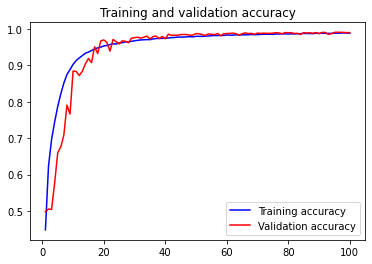

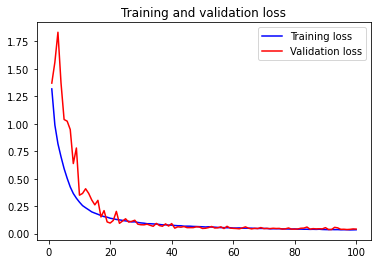

In [ ]:
plot_function(history)

In [ ]:
test_model = keras.models.load_model("models/"+str(num_classes)+"_Categories_Model.h5")
test_loss, test_acc = test_model.evaluate(X_test, y_test)
print(f"Test accuracy: {test_acc:.3f}")

16/16 [==============================] - 1s 11ms/step - loss: 0.0413 - accuracy: 0.9900
Test accuracy: 0.990


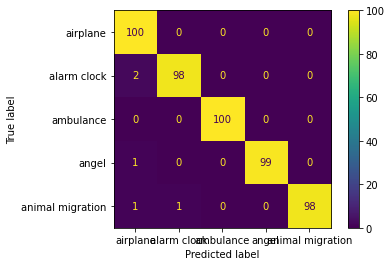

In [ ]:
from sklearn import metrics
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
l=os.listdir('Data/'+str(num_classes)+'_Categories/trainset')
li=[x.split('.')[0] for x in l]

predictions = test_model.predict(X_test) 
y_pred = (predictions >= 0.5)
rounded_labels=np.argmax(y_test, axis=1)

matrix = metrics.confusion_matrix(rounded_labels, y_pred.argmax(axis=1))
matrix.diagonal()/matrix.sum(axis=1)
cmd = ConfusionMatrixDisplay(matrix, display_labels=li)
cmd.plot()